### Loading Libraries and Data

In [1]:
pip install fasttext


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.8/68.8 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.11.1-py3-none-any.whl (227 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4199771 sha256=7e5a7cd012b9437e3d065b2189cf7defef560212406ee371fe827d2c2268056f
  Stored in directory: /root/.cache/pip/wheels/a5/13/75/f811c84a8ab36eedbaef977a6a58a98990e8e0f1967f98f394
Successfully built fasttext


In [2]:
pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.8/110.8 kB 17.1 MB/s eta 0:00:00


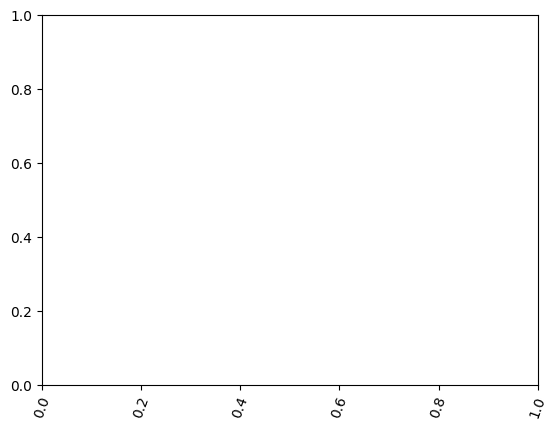

In [25]:
# import necessary libraries
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
from nltk.tokenize import MWETokenizer
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt

plt.xticks(rotation=70)
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', 100)
%matplotlib inline


In [5]:
import json

In [8]:
# import data into pandas dataframe

data = []
with open('/content/drive/MyDrive/DATA 495/transcripts_en_2023-01-16.json', 'r') as file:
    for line in file:
        try:
            json_data = json.loads(line)
            data.append(json_data)
        except json.JSONDecodeError:
            print(f"Invalid JSON data: {line}")

df = pd.DataFrame(data)



In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9349 entries, 0 to 9348
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   date                   9349 non-null   object
 1   persons                9349 non-null   object
 2   transcript_unfiltered  9349 non-null   object
 3   kremlin_id             9349 non-null   int64 
 4   place                  9349 non-null   object
 5   title                  9349 non-null   object
 6   teaser                 9349 non-null   object
 7   tags                   9349 non-null   object
 8   transcript_filtered    9349 non-null   object
 9   wordlist               9349 non-null   object
dtypes: int64(1), object(9)
memory usage: 730.5+ KB


In [10]:
# it looks like there are no null values, but check
for col in df.columns:
    print(col, df[col].isnull().sum())

date 0
persons 0
transcript_unfiltered 0
kremlin_id 0
place 0
title 0
teaser 0
tags 0
transcript_filtered 0
wordlist 0


In [11]:
df.sample(5)  # Display a random sample of 5 rows


,date,persons,transcript_unfiltered,kremlin_id,place,title,teaser,tags,transcript_filtered,wordlist
3534,2010-08-20T21:30:00,[],"* * * President of Russia Dmitry Medvedev: Ms Otunbayeva, I'm very glad to be having this meetin...",8703,Yerevan,Meeting with President of Kyrgyzstan Roza Otunbayeva,The two leaders discussed the development of economic and humanitarian ties. The meeting took pl...,[Foreign policy],"Ms Otunbayeva, I'm very glad to be having this meeting with you in a bilateral format. We have j...","[Ms, Otunbayeva, ,, I, be, very, glad, to, be, have, this, meeting, with, you, in, a, bilateral,..."
5207,2014-04-01T12:15:00,[],"President of Russia Vladimir Putin: Good morning, Mr Minnikhanov, I believe you wanted to talk a...",20671,"Novo-Ogaryovo, Moscow Region",Meeting with Head of Tatarstan Rustam Minnikhanov,Vladimir Putin had a working meeting with Head of the Republic of Tatarstan Rustam Minnikhanov.,"[Regions, Special economic zones]","Good morning, Mr Minnikhanov, I believe you wanted to talk about the investment component of eco...","[good, morning, ,, Mr, Minnikhanov, ,, I, believe, you, want, to, talk, about, the, investment, ..."
3106,2009-10-05T11:41:00,[],"President of Russia Dmitry Medvedev: Friends and colleagues, I would like to congratulate you on...",5663,Moscow,Speech at Award Ceremony for Winners of 2009 Russian Teacher of the Year Competition,,[],"Friends and colleagues, I would like to congratulate you on International Teachers’ Day, which h...","[friend, and, colleague, ,, I, would, like, to, congratulate, you, on, International, Teachers, ..."
6471,2016-10-21T15:20:00,[],"President of Russia Vladimir Putin: Mr Chaika, you wanted to tell me about the support of small ...",53133,"Novo-Ogaryovo, Moscow Region",Working meeting with Prosecutor General Yury Chaika,"Vladimir Putin met with Russia’s Prosecutor General Yury Chaika, who reported to the President o...",[Support for business],"Mr Chaika, you wanted to tell me about the support of small and medium-sized businesses. Please ...","[Mr, Chaika, ,, you, want, to, tell, I, about, the, support, of, small, and, medium, -, sized, b..."
7016,2017-10-25T18:45:00,[],The presidents discussed further prospects of bilateral relations. Attending the talks on the Ru...,55920,"The Kremlin, Moscow",Talks with President of Germany Frank-Walter Steinmeier,Vladimir Putin held talks with President of the Federal Republic of Germany Frank-Walter Steinme...,[Foreign policy],"Mr President, colleagues, It is a pleasure to welcome you to Moscow, to the Kremlin. We met in M...","[Mr, President, ,, colleague, ,, it, be, a, pleasure, to, welcome, you, to, Moscow, ,, to, the, ..."


In [12]:
# Drop unneeded columns
columns_to_drop = ['kremlin_id', 'teaser', 'tags', 'transcript_filtered', 'wordlist']

df = df.drop(columns=columns_to_drop)

In [13]:
sample_transcripts = df['transcript_unfiltered'].sample(5)
print(sample_transcripts)


176     Vladimir Putin: Good afternoon, colleagues! First of all, I want to congratulate you on the begi...
2302    President of Russia Dmitry Medvedev: Mr Vice Chancellor, it gives me pleasure to welcome you.  I...
5192    Among the issues discussed were organising the transport system’s operation in Crimea and reform...
7495    The two leaders discussed key issues of developing allied Russian-Armenian relations and coopera...
3124    President of Russia Dmitry Medvedev: Mr President, ladies and gentlemen, I am truly happy to wel...
Name: transcript_unfiltered, dtype: object


In [14]:
print(df['transcript_unfiltered'].dtype)

object


### Text Preprocessing

#### Expand Contractions

In [15]:
# Expand contractions in "transcript_unfiltered" column

df['no_contract'] = df['transcript_unfiltered'].apply(lambda x: [contractions.fix(word) for word in x.split()])

In [16]:
# Create column with transcript with expanded contractions called "transcript_unfiltered_str"

df['transcript_unfiltered_str'] = [' '.join(map(str, l)) for l in df['no_contract']]
df.head()

,date,persons,transcript_unfiltered,place,title,no_contract,transcript_unfiltered_str
0,1999-12-31T00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...","The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,"[Vladimir, Putin:, Dear, friends,, On, New, Year’s, Eve,, my, family, and, I, planned, to, gathe...","Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,..."
1,1999-12-31T00:02:00,[],"Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...","The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,"[Vladimir, Putin:, Good, afternoon,, distinguished, colleagues., This, will, be, a, short, meeti...","Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask..."
2,1999-12-31T00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...","The Kremlin, Moscow",Statement by Boris Yeltsin,"[Boris, Yeltsin:, Dear, Russians,, In, a, few, hours, we, will, see, a, magical, date, on, our, ...","Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye..."
3,2000-01-04T00:00:00,[],"Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",Moscow,Interview with the ORT TV Channel,"[Question:, Mr, Putin,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, question...","Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou..."
4,2000-01-11T00:00:00,[],"Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...","State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,"[Vladimir, Putin:, Dear, friends,, We, are, again, gathered, here, today,, this, time, on, the, ...","Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the..."


#### Detect (and remove) non-English Words

In [21]:
import io


pretrained_model = "/content/drive/MyDrive/DATA 495/lid.176.bin"
model = fasttext.load_model(pretrained_model)
langs = []
for sent in df['transcript_unfiltered_str']:
    lang = model.predict(sent)[0]
    langs.append(str(lang)[11:13])
df['langs'] = langs

#### Tokenize

In [22]:
nltk.download('punkt')

# punkt is a sentence tokenizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [23]:
# tokenize transcript into words

df['transcripts_word_tokenized'] = df['transcript_unfiltered_str'].apply(word_tokenize)
df.head()

,date,persons,transcript_unfiltered,place,title,no_contract,transcript_unfiltered_str,langs,transcripts_word_tokenized
0,1999-12-31T00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...","The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,"[Vladimir, Putin:, Dear, friends,, On, New, Year’s, Eve,, my, family, and, I, planned, to, gathe...","Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...",en,"[Vladimir, Putin, :, Dear, friends, ,, On, New, Year, ’, s, Eve, ,, my, family, and, I, planned,..."
1,1999-12-31T00:02:00,[],"Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...","The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,"[Vladimir, Putin:, Good, afternoon,, distinguished, colleagues., This, will, be, a, short, meeti...","Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...",en,"[Vladimir, Putin, :, Good, afternoon, ,, distinguished, colleagues, ., This, will, be, a, short,..."
2,1999-12-31T00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...","The Kremlin, Moscow",Statement by Boris Yeltsin,"[Boris, Yeltsin:, Dear, Russians,, In, a, few, hours, we, will, see, a, magical, date, on, our, ...","Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...",en,"[Boris, Yeltsin, :, Dear, Russians, ,, In, a, few, hours, we, will, see, a, magical, date, on, o..."
3,2000-01-04T00:00:00,[],"Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",Moscow,Interview with the ORT TV Channel,"[Question:, Mr, Putin,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, question...","Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",en,"[Question, :, Mr, Putin, ,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, ques..."
4,2000-01-11T00:00:00,[],"Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...","State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,"[Vladimir, Putin:, Dear, friends,, We, are, again, gathered, here, today,, this, time, on, the, ...","Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...",en,"[Vladimir, Putin, :, Dear, friends, ,, We, are, again, gathered, here, today, ,, this, time, on,..."


In [24]:
# tokenize transcripts by sentence

df['transcripts_sentence_tokenized'] = df['transcript_unfiltered_str'].apply(sent_tokenize)
df.head()

,date,persons,transcript_unfiltered,place,title,no_contract,transcript_unfiltered_str,langs,transcripts_word_tokenized,transcripts_sentence_tokenized
0,1999-12-31T00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...","The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,"[Vladimir, Putin:, Dear, friends,, On, New, Year’s, Eve,, my, family, and, I, planned, to, gathe...","Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...",en,"[Vladimir, Putin, :, Dear, friends, ,, On, New, Year, ’, s, Eve, ,, my, family, and, I, planned,...","[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV..."
1,1999-12-31T00:02:00,[],"Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...","The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,"[Vladimir, Putin:, Good, afternoon,, distinguished, colleagues., This, will, be, a, short, meeti...","Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...",en,"[Vladimir, Putin, :, Good, afternoon, ,, distinguished, colleagues, ., This, will, be, a, short,...","[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ..."
2,1999-12-31T00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...","The Kremlin, Moscow",Statement by Boris Yeltsin,"[Boris, Yeltsin:, Dear, Russians,, In, a, few, hours, we, will, see, a, magical, date, on, our, ...","Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...",en,"[Boris, Yeltsin, :, Dear, Russians, ,, In, a, few, hours, we, will, see, a, magical, date, on, o...","[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y..."
3,2000-01-04T00:00:00,[],"Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",Moscow,Interview with the ORT TV Channel,"[Question:, Mr, Putin,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, question...","Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",en,"[Question, :, Mr, Putin, ,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, ques...","[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co..."
4,2000-01-11T00:00:00,[],"Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...","State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,"[Vladimir, Putin:, Dear, friends,, We, are, again, gathered, here, today,, this, time, on, the, ...","Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...",en,"[Vladimir, Putin, :, Dear, friends, ,, We, are, again, gathered, here, today, ,, this, time, on,...","[Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of th..."


##### Combine key words, abbreviations, etc back into phrases

In [33]:


tokenizedwords_list = df['transcripts_word_tokenized'].tolist()

# Flatten the list of lists to get a single list of words
all_words = [word for sublist in tokenizedwords_list for word in sublist]





IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [40]:
# search for words around key words to identify necessary phrases
from nltk.text import Text


text = Text(all_words)

# Find concordances for specific target words
text.concordance("America", width=10)
text.concordance("States", width=50)
text.concordance("Atlantic", width=10)
text.concordance("Missile", width=10)
text.concordance("revolutions", width=30)
text.concordance("Eurasia", width=10)
text.concordance("defense", width =20)
text.concordance("NATO", width = 10)


Displaying 25 of 1343 matches:
and Latin America 
in North America 
States of America 
in Latin America 
some of America 
, North America 
in North America 
proposed by America 
less than America 
or Latin America 
or North America 
, as America 
, Central America 
situation like America 
and North America 
and North America 
and North America 
Europe and America 
to North America 
and Latin America 
in Latin America 
its Latin America 
in Latin America 
of Latin America 
, Latin America 
Displaying 25 of 8676 matches:
wealth of Independent States . As to the issue of 
 named and with other states . There are ways to m
wealth of Independent States , and Alexander Grigo
ther heads of the CIS states said that we should n
ts of our peoples and states . I said : “ Mr Putin
cooperation with some states . This does not mean 
e on the part of many states to make integration i
tion to benefit those states that have shown inter
gain , there are such states . Vladimir Putin : De
an Union , the U

#### Lowercase, no punctuation, etc...


In [42]:
df['lower'] = df['transcripts_word_tokenized'].apply(lambda x: [word.lower() for word in x])
df.head()

,date,persons,transcript_unfiltered,place,title,no_contract,transcript_unfiltered_str,langs,transcripts_word_tokenized,transcripts_sentence_tokenized,lower
0,1999-12-31T00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...","The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,"[Vladimir, Putin:, Dear, friends,, On, New, Year’s, Eve,, my, family, and, I, planned, to, gathe...","Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...",en,"[Vladimir, Putin, :, Dear, friends, ,, On, New, Year, ’, s, Eve, ,, my, family, and, I, planned,...","[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV...","[vladimir, putin, :, dear, friends, ,, on, new, year, ’, s, eve, ,, my, family, and, i, planned,..."
1,1999-12-31T00:02:00,[],"Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...","The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,"[Vladimir, Putin:, Good, afternoon,, distinguished, colleagues., This, will, be, a, short, meeti...","Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...",en,"[Vladimir, Putin, :, Good, afternoon, ,, distinguished, colleagues, ., This, will, be, a, short,...","[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ...","[vladimir, putin, :, good, afternoon, ,, distinguished, colleagues, ., this, will, be, a, short,..."
2,1999-12-31T00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...","The Kremlin, Moscow",Statement by Boris Yeltsin,"[Boris, Yeltsin:, Dear, Russians,, In, a, few, hours, we, will, see, a, magical, date, on, our, ...","Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...",en,"[Boris, Yeltsin, :, Dear, Russians, ,, In, a, few, hours, we, will, see, a, magical, date, on, o...","[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y...","[boris, yeltsin, :, dear, russians, ,, in, a, few, hours, we, will, see, a, magical, date, on, o..."
3,2000-01-04T00:00:00,[],"Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",Moscow,Interview with the ORT TV Channel,"[Question:, Mr, Putin,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, question...","Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",en,"[Question, :, Mr, Putin, ,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, ques...","[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co...","[question, :, mr, putin, ,, the, sudden, resignation, of, mr, yeltsin, has, prompted, many, ques..."
4,2000-01-11T00:00:00,[],"Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...","State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,"[Vladimir, Putin:, Dear, friends,, We, are, again, gathered, here, today,, this, time, on, the, ...","Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...",en,"[Vladimir, Putin, :, Dear, friends, ,, We, are, again, gathered, here, today, ,, this, time, on,...","[Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of th...","[vladimir, putin, :, dear, friends, ,, we, are, again, gathered, here, today, ,, this, time, on,..."


In [44]:
# recombine some of the words into phrase tokens

# create list of tuples to be combined into phrases using nltk mwetokenizer

mwe_list = [("north", "america"), ("colored", "revolutions"), ("commonwealth", "of", "independent", "states"), ("anti-ballistic", "missile", "defense"),
            ("missile", "defense"), ("european", "union"), ("eurasian", "economic", "union"), ("north", "atlantic", "treaty", "organization"),
            ("united", "nations"), ("security", "council")]

# Create an MWE tokenizer using the list of MWEs
mwe_tokenizer = nltk.MWETokenizer(mwe_list)

# Tokenize your the lower case word transcripts with the MWE tokenizer
df['transcripts_phrase_tokenized'] = df['lower'].apply(mwe_tokenizer.tokenize)

In [ ]:
df.head()

In [46]:
# remove punctuation
punc = string.punctuation
df['no_punc'] = df['transcripts_phrase_tokenized'].apply(lambda x: [word for word in x if word not in punc])
df.head()

,date,persons,transcript_unfiltered,place,title,no_contract,transcript_unfiltered_str,langs,transcripts_word_tokenized,transcripts_sentence_tokenized,lower,transcripts_phrase_tokenized,no_punc
0,1999-12-31T00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...","The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,"[Vladimir, Putin:, Dear, friends,, On, New, Year’s, Eve,, my, family, and, I, planned, to, gathe...","Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...",en,"[Vladimir, Putin, :, Dear, friends, ,, On, New, Year, ’, s, Eve, ,, my, family, and, I, planned,...","[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV...","[vladimir, putin, :, dear, friends, ,, on, new, year, ’, s, eve, ,, my, family, and, i, planned,...","[vladimir, putin, :, dear, friends, ,, on, new, year, ’, s, eve, ,, my, family, and, i, planned,...","[vladimir, putin, dear, friends, on, new, year, ’, s, eve, my, family, and, i, planned, to, gath..."
1,1999-12-31T00:02:00,[],"Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...","The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,"[Vladimir, Putin:, Good, afternoon,, distinguished, colleagues., This, will, be, a, short, meeti...","Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...",en,"[Vladimir, Putin, :, Good, afternoon, ,, distinguished, colleagues, ., This, will, be, a, short,...","[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ...","[vladimir, putin, :, good, afternoon, ,, distinguished, colleagues, ., this, will, be, a, short,...","[vladimir, putin, :, good, afternoon, ,, distinguished, colleagues, ., this, will, be, a, short,...","[vladimir, putin, good, afternoon, distinguished, colleagues, this, will, be, a, short, meeting,..."
2,1999-12-31T00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...","The Kremlin, Moscow",Statement by Boris Yeltsin,"[Boris, Yeltsin:, Dear, Russians,, In, a, few, hours, we, will, see, a, magical, date, on, our, ...","Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...",en,"[Boris, Yeltsin, :, Dear, Russians, ,, In, a, few, hours, we, will, see, a, magical, date, on, o...","[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y...","[boris, yeltsin, :, dear, russians, ,, in, a, few, hours, we, will, see, a, magical, date, on, o...","[boris, yeltsin, :, dear, russians, ,, in, a, few, hours, we, will, see, a, magical, date, on, o...","[boris, yeltsin, dear, russians, in, a, few, hours, we, will, see, a, magical, date, on, our, ca..."
3,2000-01-04T00:00:00,[],"Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",Moscow,Interview with the ORT TV Channel,"[Question:, Mr, Putin,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, question...","Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",en,"[Question, :, Mr, Putin, ,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, ques...","[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co...","[question, :, mr, putin, ,, the, sudden, resignation, of, mr, yeltsin, has, prompted, many, ques...","[question, :, mr, putin, ,, the, sudden, resignation, of, mr, yeltsin, has, prompted, many, ques...","[question, mr, putin, the, sudden, resignation, of, mr, yeltsin, has, prompted, many, questions,..."
4,2000-01-11T00:00:00,[],"Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of the...","State Kremlin Palace, Moscow",Speech at gala function 

In [47]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [48]:
# remove stopwords

stop_words = set(stopwords.words('english'))
df['stopwords_removed'] = df['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
df.head()

,date,persons,transcript_unfiltered,place,title,no_contract,transcript_unfiltered_str,langs,transcripts_word_tokenized,transcripts_sentence_tokenized,lower,transcripts_phrase_tokenized,no_punc,stopwords_removed
0,1999-12-31T00:01:00,[],"Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...","The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,"[Vladimir, Putin:, Dear, friends,, On, New, Year’s, Eve,, my, family, and, I, planned, to, gathe...","Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV,...",en,"[Vladimir, Putin, :, Dear, friends, ,, On, New, Year, ’, s, Eve, ,, my, family, and, I, planned,...","[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV...","[vladimir, putin, :, dear, friends, ,, on, new, year, ’, s, eve, ,, my, family, and, i, planned,...","[vladimir, putin, :, dear, friends, ,, on, new, year, ’, s, eve, ,, my, family, and, i, planned,...","[vladimir, putin, dear, friends, on, new, year, ’, s, eve, my, family, and, i, planned, to, gath...","[vladimir, putin, dear, friends, new, year, ’, eve, family, planned, gather, round, tv, probably..."
1,1999-12-31T00:02:00,[],"Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...","The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,"[Vladimir, Putin:, Good, afternoon,, distinguished, colleagues., This, will, be, a, short, meeti...","Vladimir Putin: Good afternoon, distinguished colleagues. This will be a short meeting. I am ask...",en,"[Vladimir, Putin, :, Good, afternoon, ,, distinguished, colleagues, ., This, will, be, a, short,...","[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ...","[vladimir, putin, :, good, afternoon, ,, distinguished, colleagues, ., this, will, be, a, short,...","[vladimir, putin, :, good, afternoon, ,, distinguished, colleagues, ., this, will, be, a, short,...","[vladimir, putin, good, afternoon, distinguished, colleagues, this, will, be, a, short, meeting,...","[vladimir, putin, good, afternoon, distinguished, colleagues, short, meeting, asking, continue, ..."
2,1999-12-31T00:03:00,[],"Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...","The Kremlin, Moscow",Statement by Boris Yeltsin,"[Boris, Yeltsin:, Dear, Russians,, In, a, few, hours, we, will, see, a, magical, date, on, our, ...","Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the ye...",en,"[Boris, Yeltsin, :, Dear, Russians, ,, In, a, few, hours, we, will, see, a, magical, date, on, o...","[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y...","[boris, yeltsin, :, dear, russians, ,, in, a, few, hours, we, will, see, a, magical, date, on, o...","[boris, yeltsin, :, dear, russians, ,, in, a, few, hours, we, will, see, a, magical, date, on, o...","[boris, yeltsin, dear, russians, in, a, few, hours, we, will, see, a, magical, date, on, our, ca...","[boris, yeltsin, dear, russians, hours, see, magical, date, calendars, year, 2000, new, century,..."
3,2000-01-04T00:00:00,[],"Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",Moscow,Interview with the ORT TV Channel,"[Question:, Mr, Putin,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, question...","Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this cou...",en,"[Question, :, Mr, Putin, ,, the, sudden, resignation, of, Mr, Yeltsin, has, prompted, many, ques...","[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co...","[question, :, mr, putin, ,, the, sudden, resignation, of, mr, yeltsin, has, prompted, many, ques...","[question, :, mr, putin, ,, the, sudden, resignation, of, mr,

In [50]:
# drop newly unnecessary columns (we created the column we really want)
# this should leave us with just the sentence tokenized and the cleaned phrase
# tokenized columns (plus place and date and language)

columns_to_drop2 = ['transcript_unfiltered', 'no_contract', 'transcript_unfiltered_str', 'transcripts_word_tokenized',
                    'lower', 'no_punc', 'transcripts_phrase_tokenized']

df_clean = df.drop(columns=columns_to_drop2)
df_clean.head()



,date,persons,place,title,langs,transcripts_sentence_tokenized,stopwords_removed
0,1999-12-31T00:01:00,[],"The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,en,"[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV...","[vladimir, putin, dear, friends, new, year, ’, eve, family, planned, gather, round, tv, probably..."
1,1999-12-31T00:02:00,[],"The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,en,"[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ...","[vladimir, putin, good, afternoon, distinguished, colleagues, short, meeting, asking, continue, ..."
2,1999-12-31T00:03:00,[],"The Kremlin, Moscow",Statement by Boris Yeltsin,en,"[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y...","[boris, yeltsin, dear, russians, hours, see, magical, date, calendars, year, 2000, new, century,..."
3,2000-01-04T00:00:00,[],Moscow,Interview with the ORT TV Channel,en,"[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co...","[question, mr, putin, sudden, resignation, mr, yeltsin, prompted, many, questions, country, abro..."
4,2000-01-11T00:00:00,[],"State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,en,"[Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of th...","[vladimir, putin, dear, friends, gathered, today, time, occasion, joyful, celebration, christ, ’..."


#### Lemmatization

There is some debate over whether stemming or lemmatization is most useful, but it seems lemmatization is better when context matters.

In [55]:
 nltk.download('averaged_perceptron_tagger')

# apply part of speech tags
df_clean['pos_tags'] = df_clean['stopwords_removed'].apply(nltk.tag.pos_tag)
df_clean.head()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,date,persons,place,title,langs,transcripts_sentence_tokenized,stopwords_removed,pos_tags
0,1999-12-31T00:01:00,[],"The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,en,"[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV...","[vladimir, putin, dear, friends, new, year, ’, eve, family, planned, gather, round, tv, probably...","[(vladimir, NN), (putin, NN), (dear, JJ), (friends, NNS), (new, JJ), (year, NN), (’, NN), (eve, ..."
1,1999-12-31T00:02:00,[],"The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,en,"[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ...","[vladimir, putin, good, afternoon, distinguished, colleagues, short, meeting, asking, continue, ...","[(vladimir, NN), (putin, NN), (good, JJ), (afternoon, NN), (distinguished, VBD), (colleagues, NN..."
2,1999-12-31T00:03:00,[],"The Kremlin, Moscow",Statement by Boris Yeltsin,en,"[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y...","[boris, yeltsin, dear, russians, hours, see, magical, date, calendars, year, 2000, new, century,...","[(boris, NN), (yeltsin, NN), (dear, JJ), (russians, NNS), (hours, NNS), (see, VBP), (magical, JJ..."
3,2000-01-04T00:00:00,[],Moscow,Interview with the ORT TV Channel,en,"[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co...","[question, mr, putin, sudden, resignation, mr, yeltsin, prompted, many, questions, country, abro...","[(question, NN), (mr, NN), (putin, NN), (sudden, JJ), (resignation, NN), (mr, NN), (yeltsin, NN)..."
4,2000-01-11T00:00:00,[],"State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,en,"[Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of th...","[vladimir, putin, dear, friends, gathered, today, time, occasion, joyful, celebration, christ, ’...","[(vladimir, NN), (putin, NN), (dear, JJ), (friends, NNS), (gathered, VBN), (today, NN), (time, N..."


In [56]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [57]:
# function to convert pos tag to wordnet format for nltk
# source:  https://towardsdatascience.com/preprocessing-text-data-using-python-576206753c28

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
df_clean['wordnet_pos'] = df_clean['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
df_clean.head()

,date,persons,place,title,langs,transcripts_sentence_tokenized,stopwords_removed,pos_tags,wordnet_pos
0,1999-12-31T00:01:00,[],"The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,en,"[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV...","[vladimir, putin, dear, friends, new, year, ’, eve, family, planned, gather, round, tv, probably...","[(vladimir, NN), (putin, NN), (dear, JJ), (friends, NNS), (new, JJ), (year, NN), (’, NN), (eve, ...","[(vladimir, n), (putin, n), (dear, a), (friends, n), (new, a), (year, n), (’, n), (eve, v), (fam..."
1,1999-12-31T00:02:00,[],"The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,en,"[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ...","[vladimir, putin, good, afternoon, distinguished, colleagues, short, meeting, asking, continue, ...","[(vladimir, NN), (putin, NN), (good, JJ), (afternoon, NN), (distinguished, VBD), (colleagues, NN...","[(vladimir, n), (putin, n), (good, a), (afternoon, n), (distinguished, v), (colleagues, n), (sho..."
2,1999-12-31T00:03:00,[],"The Kremlin, Moscow",Statement by Boris Yeltsin,en,"[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y...","[boris, yeltsin, dear, russians, hours, see, magical, date, calendars, year, 2000, new, century,...","[(boris, NN), (yeltsin, NN), (dear, JJ), (russians, NNS), (hours, NNS), (see, VBP), (magical, JJ...","[(boris, n), (yeltsin, n), (dear, a), (russians, n), (hours, n), (see, v), (magical, a), (date, ..."
3,2000-01-04T00:00:00,[],Moscow,Interview with the ORT TV Channel,en,"[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co...","[question, mr, putin, sudden, resignation, mr, yeltsin, prompted, many, questions, country, abro...","[(question, NN), (mr, NN), (putin, NN), (sudden, JJ), (resignation, NN), (mr, NN), (yeltsin, NN)...","[(question, n), (mr, n), (putin, n), (sudden, a), (resignation, n), (mr, n), (yeltsin, n), (prom..."
4,2000-01-11T00:00:00,[],"State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,en,"[Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of th...","[vladimir, putin, dear, friends, gathered, today, time, occasion, joyful, celebration, christ, ’...","[(vladimir, NN), (putin, NN), (dear, JJ), (friends, NNS), (gathered, VBN), (today, NN), (time, N...","[(vladimir, n), (putin, n), (dear, a), (friends, n), (gathered, v), (today, n), (time, n), (occa..."


In [58]:
# Apply NLTK WordNetLemmatizer

wnl = WordNetLemmatizer()
df_clean['lemmatized'] = df_clean['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
df_clean.head()

,date,persons,place,title,langs,transcripts_sentence_tokenized,stopwords_removed,pos_tags,wordnet_pos,lemmatized
0,1999-12-31T00:01:00,[],"The Kremlin, Moscow",New Year Address by Acting President Vladimir Putin,en,"[Vladimir Putin: Dear friends, On New Year’s Eve, my family and I planned to gather round the TV...","[vladimir, putin, dear, friends, new, year, ’, eve, family, planned, gather, round, tv, probably...","[(vladimir, NN), (putin, NN), (dear, JJ), (friends, NNS), (new, JJ), (year, NN), (’, NN), (eve, ...","[(vladimir, n), (putin, n), (dear, a), (friends, n), (new, a), (year, n), (’, n), (eve, v), (fam...","[vladimir, putin, dear, friend, new, year, ’, eve, family, plan, gather, round, tv, probably, li..."
1,1999-12-31T00:02:00,[],"The Kremlin, Moscow",Address at an expanded meeting of the Russian Security Council,en,"[Vladimir Putin: Good afternoon, distinguished colleagues., This will be a short meeting., I am ...","[vladimir, putin, good, afternoon, distinguished, colleagues, short, meeting, asking, continue, ...","[(vladimir, NN), (putin, NN), (good, JJ), (afternoon, NN), (distinguished, VBD), (colleagues, NN...","[(vladimir, n), (putin, n), (good, a), (afternoon, n), (distinguished, v), (colleagues, n), (sho...","[vladimir, putin, good, afternoon, distinguish, colleague, short, meeting, ask, continue, work, ..."
2,1999-12-31T00:03:00,[],"The Kremlin, Moscow",Statement by Boris Yeltsin,en,"[Boris Yeltsin: Dear Russians, In a few hours we will see a magical date on our calendars, the y...","[boris, yeltsin, dear, russians, hours, see, magical, date, calendars, year, 2000, new, century,...","[(boris, NN), (yeltsin, NN), (dear, JJ), (russians, NNS), (hours, NNS), (see, VBP), (magical, JJ...","[(boris, n), (yeltsin, n), (dear, a), (russians, n), (hours, n), (see, v), (magical, a), (date, ...","[boris, yeltsin, dear, russian, hour, see, magical, date, calendar, year, 2000, new, century, ne..."
3,2000-01-04T00:00:00,[],Moscow,Interview with the ORT TV Channel,en,"[Question: Mr Putin, the sudden resignation of Mr Yeltsin has prompted many questions in this co...","[question, mr, putin, sudden, resignation, mr, yeltsin, prompted, many, questions, country, abro...","[(question, NN), (mr, NN), (putin, NN), (sudden, JJ), (resignation, NN), (mr, NN), (yeltsin, NN)...","[(question, n), (mr, n), (putin, n), (sudden, a), (resignation, n), (mr, n), (yeltsin, n), (prom...","[question, mr, putin, sudden, resignation, mr, yeltsin, prompt, many, question, country, abroad,..."
4,2000-01-11T00:00:00,[],"State Kremlin Palace, Moscow",Speech at gala function marking the second millennium of Christ’s birth,en,"[Vladimir Putin: Dear friends, We are again gathered here today, this time on the occasion of th...","[vladimir, putin, dear, friends, gathered, today, time, occasion, joyful, celebration, christ, ’...","[(vladimir, NN), (putin, NN), (dear, JJ), (friends, NNS), (gathered, VBN), (today, NN), (time, N...","[(vladimir, n), (putin, n), (dear, a), (friends, n), (gathered, v), (today, n), (time, n), (occa...","[vladimir, putin, dear, friend, gather, today, time, occasion, joyful, celebration, christ, ’, b..."


In [60]:
# Save pre-processed file

df_clean.to_csv('/content/drive/MyDrive/DATA 495/preprocessed_text.csv')
